In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs

In [2]:
df = pd.read_csv('final_total', sep=' ', na_values=['na'])
df2 = df.dropna(ignore_index=True)
df2

,CHEMBLID,smiles,ido_ic50,tdo_ic50
0,CHEMBL1098875,O=C1c2cc(F)ccc2-n2c1nc1ccccc1c2=O,23.0,60.0
1,CHEMBL1209728,Cc1c(Br)oc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,10000.0,10000.0
2,CHEMBL1276265,O=C1c2ccc(Cl)cc2-n2c1nc1ccccc1c2=O,183.0,224200.0
3,CHEMBL1346056,Oc1ccccc1-c1nc2c3ccccc3c3ccccc3c2[nH]1,11790.0,12250.0
4,CHEMBL139935,O=[N+]([O-])c1cc(F)c2cccnc2c1O,14610.0,30230.0
...,...,...,...,...
755,CHEMBL5221020,O[C@@H]1CCCC[C@H]1CNc1c(Br)ccc2[nH]ncc12,1230.0,11240.0
756,CHEMBL5221102,Brc1cc(NC[C@H]2CCCN2)c2cn[nH]c2c1,56450.0,7450.0
757,CHEMBL578036,CC1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(CO)coc2-1,10000.0,450.0
758,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,50.0,10000.0


In [3]:
from rdkit.Chem import SaltRemover as sr
remover = sr.SaltRemover()

In [4]:
mols = []
for i in range(len(df2['smiles'])):
    mol_i = Chem.MolFromSmiles(df2['smiles'][i])
    mol_i = remover.StripMol(mol_i, dontRemoveEverything=True)
    mols.append(mol_i)
len(mols)

760

In [5]:
#Morgan Fingerprints:
fpgen2 = AllChem.GetMorganGenerator()
i = 0
l2 = np.zeros((1, 2048), dtype='uint8')
for mol in mols:
    fp2 = fpgen2.GetFingerprintAsNumPy(mols[i])
    l2 = np.vstack((l2, fp2))
    i += 1
mfp = l2[1:, :]
mfp.shape
mfp.sum()

45791

In [6]:
dfFP = pd.DataFrame(mfp)
dfFP

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pca = PCA(n_components=100)

In [12]:
nums = np.arange(100)
nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [13]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit_transform(dfFP)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

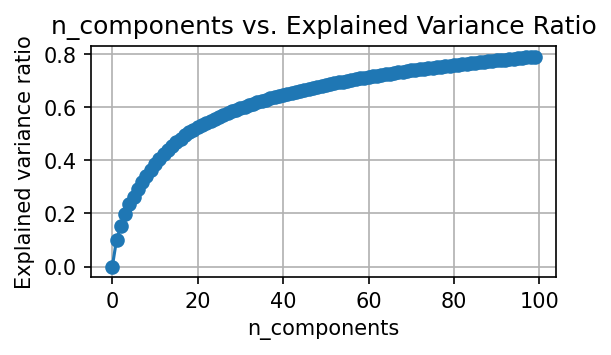

In [14]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [15]:
df2.loc[:, 'ido_ic50'] = (np.log10((df2.loc[:, 'ido_ic50'])*10**(-9)))*(-1)

In [16]:
df2.loc[:, 'tdo_ic50'] = (np.log10((df2.loc[:, 'tdo_ic50'])*10**(-9)))*(-1)

In [17]:
df2

,CHEMBLID,smiles,ido_ic50,tdo_ic50
0,CHEMBL1098875,O=C1c2cc(F)ccc2-n2c1nc1ccccc1c2=O,7.638272,7.221849
1,CHEMBL1209728,Cc1c(Br)oc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,5.000000,5.000000
2,CHEMBL1276265,O=C1c2ccc(Cl)cc2-n2c1nc1ccccc1c2=O,6.737549,3.649364
3,CHEMBL1346056,Oc1ccccc1-c1nc2c3ccccc3c3ccccc3c2[nH]1,4.928486,4.911864
4,CHEMBL139935,O=[N+]([O-])c1cc(F)c2cccnc2c1O,4.835350,4.519562
...,...,...,...,...
755,CHEMBL5221020,O[C@@H]1CCCC[C@H]1CNc1c(Br)ccc2[nH]ncc12,5.910095,4.949234
756,CHEMBL5221102,Brc1cc(NC[C@H]2CCCN2)c2cn[nH]c2c1,4.248336,5.127844
757,CHEMBL578036,CC1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(CO)coc2-1,5.000000,6.346787
758,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,7.301030,5.000000


In [18]:
df3 = df2.loc[:, ['ido_ic50', 'tdo_ic50']]
df3

,ido_ic50,tdo_ic50
0,7.638272,7.221849
1,5.000000,5.000000
2,6.737549,3.649364
3,4.928486,4.911864
4,4.835350,4.519562
...,...,...
755,5.910095,4.949234
756,4.248336,5.127844
757,5.000000,6.346787
758,7.301030,5.000000


In [19]:
for i in range(760):
    if df3['ido_ic50'].values[i] >= 6.15:
        df3['ido_ic50'][i] = 'A'
    else:
        df3['ido_ic50'][i] = 'I'

In [20]:
for i in range(760):
    if df3['tdo_ic50'].values[i] >= 6.0:
        df3['tdo_ic50'][i] = 'A'
    else:
        df3['tdo_ic50'][i] = 'I'

/tmp/ipykernel_4673/565967957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tdo_ic50'][i] = 'A'


In [21]:
newcol = []
for i in range(760):
    if df3['ido_ic50'].values[i] == 'A' and df3['tdo_ic50'].values[i] == 'A':
        newcol.append('AA')
    elif df3['ido_ic50'].values[i] == 'I' and df3['tdo_ic50'].values[i] == 'I':
        newcol.append('II')
    elif df3['ido_ic50'].values[i] == 'I' and df3['tdo_ic50'].values[i] == 'A':
        newcol.append('IA')
    else:
        newcol.append('AI')

In [22]:
target = pd.DataFrame(data=newcol, columns=['ido_tdo'])
target

,ido_tdo
0,AA
1,II
2,AI
3,II
4,II
...,...
755,II
756,II
757,IA
758,AI


In [23]:
encoder = LabelEncoder()

In [24]:
y_labeled = encoder.fit_transform(target['ido_tdo'])

In [25]:
y_labeled

array([0, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3,
       3, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 3, 0, 0,
       1, 3, 0, 2, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0,
       3, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 3,
       0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 0, 3, 3, 0, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 3, 0, 3, 3, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 2, 0, 1, 3, 1, 0, 0, 3, 3, 0,
       0, 2, 1, 0, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 3,

In [26]:
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(dfFP)
reduced_data.shape

(760, 10)

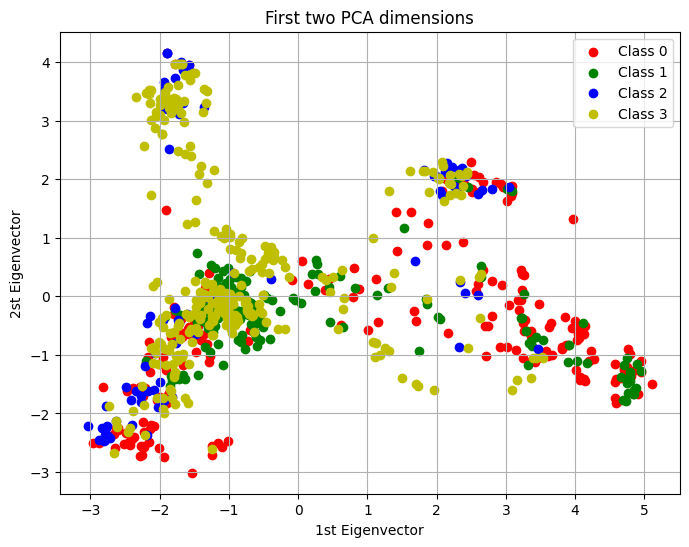

In [27]:
plt.figure(figsize=(8, 6))
for i, c in zip(np.unique(y_labeled), ['r', 'g', 'b', 'y']):
    plt.scatter(reduced_data[y_labeled == i, 0], reduced_data[y_labeled == i, 1], c=c, label=f'Class {i}')
plt.title('First two PCA dimensions')
plt.xlabel('1st Eigenvector')
plt.ylabel('2st Eigenvector')
plt.legend()
plt.grid(True)

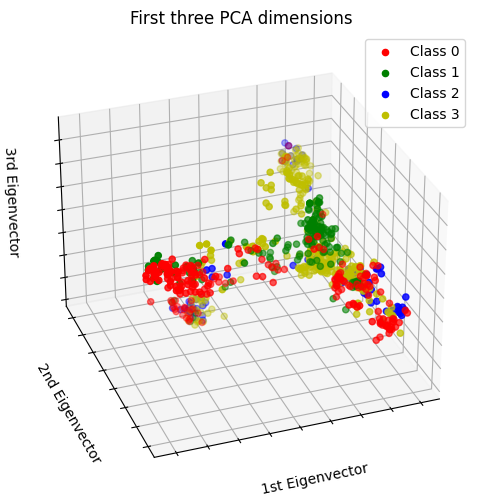

In [28]:
f = plt.figure(1, figsize=(8, 6))
ax = f.add_subplot(111, projection="3d", elev=-150, azim=110)
for i, c in zip(np.unique(y_labeled), ['r', 'g', 'b', 'y']):
    ax.scatter(reduced_data[y_labeled == i,0], reduced_data[y_labeled == i,1], reduced_data[y_labeled == i,2], c=c, label=f'Class {i}')

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
plt.legend();